# 데이터 병합
- 자세한 설명: 노션 문서 https://www.notion.so/383aec063f794481bd7d91b017257987

# 상권분석 데이터

## 모듈 설치

In [ ]:
pip install geopandas

In [ ]:
pip install folium

## 모듈 임포트

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

## 1. 데이터 선택(상권 기준 선택 이유)

  TRDAR_SE_C TRDAR_SE_1 TRDAR_CD         TRDAR_CD_N  XCNTS_VALU  YDNTS_VALU  \
0          A       골목상권  3110008    배화여자대학교(박노수미술관)    197093.0    453418.0   
1          U       관광특구  3001494         종로·청계 관광특구    199796.0    452274.0   
2          R       전통시장  3130021             신설종합시장    201854.0    452569.0   
3          R       전통시장  3130002  세종마을음식문화거리(금천교시장)    197423.0    453030.0   
4          R       전통시장  3130001               통인시장    197351.0    453449.0   

  SIGNGU_CD SIGNGU_CD_ ADSTRD_CD   ADSTRD_CD_   RELM_AR  AREA  \
0     11110        종로구  11110515        청운효자동  149264.0   NaN   
1     11110        종로구  11110615  종로1·2·3·4가동  653127.0   NaN   
2     11110        종로구  11110710         숭인2동    9800.0   NaN   
3     11110        종로구  11110530          사직동   49557.0   NaN   
4     11110        종로구  11110515        청운효자동   38280.0   NaN   

                                            geometry  
0  POLYGON ((196955.842 453722.114, 196958.669 45...  
1  POLYGON ((201385.38 4

<Axes: >

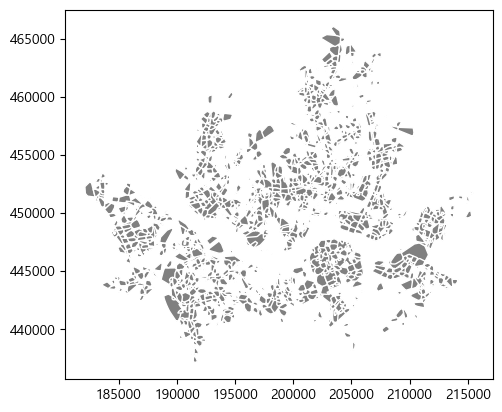

In [11]:
# geopandas 활용 시각화
# 상권 영역 시각
F1 = '..\data\영역\서울시 상권분석서비스(영역-상권)\서울시 상권분석서비스(영역-상권).shp'
D1 = gpd.read_file(F1, encoding='utf8')
print(D1.head())

D1.convex_hull.plot(color='gray', edgecolor="w")

<Axes: >

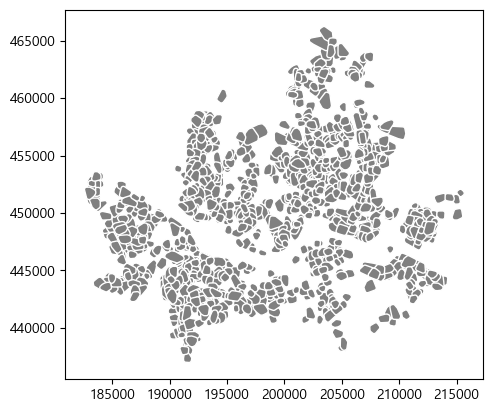

In [14]:
# 상권배후지 영역 시각
F2 = '..\data\영역\서울시 상권분석서비스(영역-상권배후지)\서울시 상권분석서비스(영역-상권배후지).shp'
D2 = gpd.read_file(F2, encoding='utf8')
D2.convex_hull.plot(color='gray', edgecolor="w")

## 결론: 상권데이터 확인

## 2. 데이터 병합

### 상권분석 데이터(상권 기준) 확인

In [1]:
pwd

'C:\\Users\\Playdata\\Desktop\\윤소영\\개발\\DE30-FinalProject-4\\Api-ai\\Ai\\ipynb'

In [3]:
import pandas as pd
# 데이터 로드
sales_data = pd.read_csv('../data/서울시_상권분석서비스(추정매출-상권)_2022년.csv', encoding='euc-kr')
income_expenditure_data = pd.read_csv('../data/서울시 상권분석서비스(소득소비-상권).csv', encoding='euc-kr')
floating_population_data = pd.read_csv('../data/서울시 상권분석서비스(길단위인구-상권).csv', encoding='euc-kr')
resident_population_data = pd.read_csv('../data/서울시 상권분석서비스(상주인구-상권).csv', encoding='euc-kr')
# 아파트 - 결측치 처리를 위해 0으로 처리
apartment_data = pd.read_csv('../data/서울시 상권분석서비스(아파트-상권).csv', encoding='euc-kr').fillna(0)
work_population_data = pd.read_csv('../data/서울시 상권분석서비스(직장인구-상권).csv', encoding='euc-kr')
# 집객시설 - 결측치 처리를 위해 0으로 처리
attraction_facility_data = pd.read_csv('../data/서울시 상권분석서비스(집객시설-상권).csv', encoding='euc-kr').fillna(0)
store_data = pd.read_csv('../data/서울시_상권분석서비스(점포-상권)_2022년.csv', encoding='euc-kr')
area_data = pd.read_csv('../data/서울시 상권분석서비스(영역-상권).csv', encoding='euc-kr')
change_data = pd.read_csv('../data/서울시 상권분석서비스(상권변화지표-상권).csv', encoding='euc-kr')

# 각 데이터프레임의 컬럼명 출력
print("서울시_상권분석서비스(추정매출-상권):", sales_data.columns)
print("서울시 상권분석서비스(소득소비-상권):", income_expenditure_data.columns)
print("서울시 상권분석서비스(길단위인구-상권):", floating_population_data.columns)
print("서울시 상권분석서비스(상주인구-상권):", resident_population_data.columns)
print("서울시 상권분석서비스(아파트-상권):", apartment_data.columns)
print("서울시 상권분석서비스(직장인구-상권):", work_population_data.columns)
print("서울시 상권분석서비스(집객시설-상권):", attraction_facility_data.columns)
print("서울시_상권분석서비스(점포-상권):", store_data.columns)
print("서울시 상권분석서비스(영역-상권):", area_data.columns)
print("서울시 상권분석서비스(상권변화지표-상권):", change_data.columns)

print()

print("데이터 구성 정보")

# 각 데이터프레임의 구성 확인
print("서울시_상권분석서비스(추정매출-상권):", sales_data.info())
print()
print("서울시 상권분석서비스(소득소비-상권):", income_expenditure_data.info())
print()
print("서울시 상권분석서비스(길단위인구-상권):", floating_population_data.info())
print()
print("서울시 상권분석서비스(상주인구-상권):", resident_population_data.info())
print()
print("서울시 상권분석서비스(아파트-상권):", apartment_data.info())
print()
print("서울시 상권분석서비스(직장인구-상권):", work_population_data.info())
print()
print("서울시 상권분석서비스(집객시설-상권):", attraction_facility_data.info())
print()
print("서울시_상권분석서비스(점포-상권):", store_data.info())
print()
print("서울시 상권분석서비스(영역-상권):", area_data.info())
print()
print("서울시 상권분석서비스(상권변화지표-상권):", change_data.info())

서울시_상권분석서비스(추정매출-상권): Index(['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
       '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액',
       '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액',
       '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액',
       '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수'],
      dtype='object')
서울시 상권분석서비스(소득소비-상권): Index(['기준_년분기_코드', '상권_구분_

### 상권분석(상권 기준) 데이터 병합

#### 2022

In [4]:
# 데이터 로드
sales_data = pd.read_csv('../data/서울시_상권분석서비스(추정매출-상권)_2022년.csv', encoding='euc-kr')
income_expenditure_data = pd.read_csv('../data/서울시 상권분석서비스(소득소비-상권).csv', encoding='euc-kr')
floating_population_data = pd.read_csv('../data/서울시 상권분석서비스(길단위인구-상권).csv', encoding='euc-kr')
resident_population_data = pd.read_csv('../data/서울시 상권분석서비스(상주인구-상권).csv', encoding='euc-kr')
# 아파트 - 결측치 처리를 위해 0으로 처리
apartment_data = pd.read_csv('../data/서울시 상권분석서비스(아파트-상권).csv', encoding='euc-kr').fillna(0)
work_population_data = pd.read_csv('../data/서울시 상권분석서비스(직장인구-상권).csv', encoding='euc-kr')
# 집객시설 - 결측치 처리를 위해 0으로 처리
attraction_facility_data = pd.read_csv('../data/서울시 상권분석서비스(집객시설-상권).csv', encoding='euc-kr').fillna(0)
store_data = pd.read_csv('../data/서울시_상권분석서비스(점포-상권)_2022년.csv', encoding='euc-kr')
area_data = pd.read_csv('../data/서울시 상권분석서비스(영역-상권).csv', encoding='euc-kr')
change_data = pd.read_csv('../data/서울시 상권분석서비스(상권변화지표-상권).csv', encoding='euc-kr')


# 데이터 병합
merged22_data = sales_data.merge(income_expenditure_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_income')) \
                        .merge(floating_population_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_floating')) \
                        .merge(resident_population_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_resident')) \
                        .merge(apartment_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_apartment')) \
                        .merge(work_population_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_work')) \
                        .merge(attraction_facility_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_attraction')) \
                        .merge(store_data, on=['기준_년분기_코드', '상권_코드','서비스_업종_코드'], how='left', suffixes=('', '_store')) \
                        .merge(area_data, on=['상권_코드'], how='left', suffixes=('', '_area')) \
                        .merge(change_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_change'))

In [6]:
# 불필요한 열 제거
columns_to_drop = ['상권_구분_코드_floating', '상권_구분_코드_명_floating', '상권_코드_명_floating', 
                   '상권_구분_코드_resident', '상권_구분_코드_명_resident', '상권_코드_명_resident',
                   '상권_구분_코드_apartment', '상권_구분_코드_명_apartment', '상권_코드_명_apartment',
                   '상권_구분_코드_work', '상권_구분_코드_명_work', '상권_코드_명_work',
                   '상권_구분_코드_attraction', '상권_구분_코드_명_attraction', '상권_코드_명_attraction',
                   '상권_구분_코드_income', '상권_구분_코드_명_income', '상권_코드_명_income',
                  '상권_구분_코드_store', '상권_구분_코드_명_store', '상권_코드_명_store','서비스_업종_코드_명_store',
                  '상권_구분_코드_area', '상권_구분_코드_명_area', '상권_코드_명_area',
                  '상권_구분_코드_change', '상권_구분_코드_명_change', '상권_코드_명_change',
                  ]


merged22_data.drop(columns=columns_to_drop, inplace=True)

merged22_data.to_csv('../data/all_merged_2022.csv', index = False)

# 결측값 개수 확인
null_counts22 = merged22_data.isnull().sum()

# 전체 결측값 개수 출력
print(null_counts22.to_string())

기준_년분기_코드                    0
상권_구분_코드                     0
상권_구분_코드_명                   0
상권_코드                        0
상권_코드_명                      0
서비스_업종_코드                    0
서비스_업종_코드_명                  0
당월_매출_금액                     0
당월_매출_건수                     0
주중_매출_금액                     0
주말_매출_금액                     0
월요일_매출_금액                    0
화요일_매출_금액                    0
수요일_매출_금액                    0
목요일_매출_금액                    0
금요일_매출_금액                    0
토요일_매출_금액                    0
일요일_매출_금액                    0
시간대_00~06_매출_금액              0
시간대_06~11_매출_금액              0
시간대_11~14_매출_금액              0
시간대_14~17_매출_금액              0
시간대_17~21_매출_금액              0
시간대_21~24_매출_금액              0
남성_매출_금액                     0
여성_매출_금액                     0
연령대_10_매출_금액                 0
연령대_20_매출_금액                 0
연령대_30_매출_금액                 0
연령대_40_매출_금액                 0
연령대_50_매출_금액                 0
연령대_60_이상_매출_금액              0
주중_매출_건수

#### 2021

In [5]:
# 데이터 로드
sales_data = pd.read_csv('../data/서울시_상권분석서비스(추정매출-상권)_2021년.csv', encoding='euc-kr')
income_expenditure_data = pd.read_csv('../data/서울시 상권분석서비스(소득소비-상권).csv', encoding='euc-kr')
floating_population_data = pd.read_csv('../data/서울시 상권분석서비스(길단위인구-상권).csv', encoding='euc-kr')
resident_population_data = pd.read_csv('../data/서울시 상권분석서비스(상주인구-상권).csv', encoding='euc-kr')
# 아파트 - 결측치 처리를 위해 0으로 처리
apartment_data = pd.read_csv('../data/서울시 상권분석서비스(아파트-상권).csv', encoding='euc-kr').fillna(0)
work_population_data = pd.read_csv('../data/서울시 상권분석서비스(직장인구-상권).csv', encoding='euc-kr')
# 집객시설 - 결측치 처리를 위해 0으로 처리
attraction_facility_data = pd.read_csv('../data/서울시 상권분석서비스(집객시설-상권).csv', encoding='euc-kr').fillna(0)
store_data = pd.read_csv('../data/서울시_상권분석서비스(점포-상권)_2021년.csv', encoding='euc-kr')
area_data = pd.read_csv('../data/서울시 상권분석서비스(영역-상권).csv', encoding='euc-kr')
change_data = pd.read_csv('../data/서울시 상권분석서비스(상권변화지표-상권).csv', encoding='euc-kr')


# 데이터 병합
merged21_data = sales_data.merge(income_expenditure_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_income')) \
                        .merge(floating_population_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_floating')) \
                        .merge(resident_population_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_resident')) \
                        .merge(apartment_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_apartment')) \
                        .merge(work_population_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_work')) \
                        .merge(attraction_facility_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_attraction')) \
                        .merge(store_data, on=['기준_년분기_코드', '상권_코드','서비스_업종_코드'], how='left', suffixes=('', '_store')) \
                        .merge(area_data, on=['상권_코드'], how='left', suffixes=('', '_area')) \
                        .merge(change_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_change'))


# 불필요한 열 제거
columns_to_drop = ['상권_구분_코드_floating', '상권_구분_코드_명_floating', '상권_코드_명_floating', 
                   '상권_구분_코드_resident', '상권_구분_코드_명_resident', '상권_코드_명_resident',
                   '상권_구분_코드_apartment', '상권_구분_코드_명_apartment', '상권_코드_명_apartment',
                   '상권_구분_코드_work', '상권_구분_코드_명_work', '상권_코드_명_work',
                   '상권_구분_코드_attraction', '상권_구분_코드_명_attraction', '상권_코드_명_attraction',
                   '상권_구분_코드_income', '상권_구분_코드_명_income', '상권_코드_명_income',
                  '상권_구분_코드_store', '상권_구분_코드_명_store', '상권_코드_명_store','서비스_업종_코드_명_store',
                  '상권_구분_코드_area', '상권_구분_코드_명_area', '상권_코드_명_area',
                  '상권_구분_코드_change', '상권_구분_코드_명_change', '상권_코드_명_change',
                  ]


merged21_data.drop(columns=columns_to_drop, inplace=True)

merged21_data.to_csv('../data/all_merged_2021.csv', index = False)

# 결측값 개수 확인
null_counts21 = merged21_data.isnull().sum()

# 전체 결측값 개수 출력
print(null_counts21.to_string())

기준_년분기_코드                    0
상권_구분_코드                     0
상권_구분_코드_명                   0
상권_코드                        0
상권_코드_명                      0
서비스_업종_코드                    0
서비스_업종_코드_명                  0
당월_매출_금액                     0
당월_매출_건수                     0
주중_매출_금액                     0
주말_매출_금액                     0
월요일_매출_금액                    0
화요일_매출_금액                    0
수요일_매출_금액                    0
목요일_매출_금액                    0
금요일_매출_금액                    0
토요일_매출_금액                    0
일요일_매출_금액                    0
시간대_00~06_매출_금액              0
시간대_06~11_매출_금액              0
시간대_11~14_매출_금액              0
시간대_14~17_매출_금액              0
시간대_17~21_매출_금액              0
시간대_21~24_매출_금액              0
남성_매출_금액                     0
여성_매출_금액                     0
연령대_10_매출_금액                 0
연령대_20_매출_금액                 0
연령대_30_매출_금액                 0
연령대_40_매출_금액                 0
연령대_50_매출_금액                 0
연령대_60_이상_매출_금액              0
주중_매출_건수

#### 2020

In [42]:
# 데이터 로드
sales_data = pd.read_csv('../data/서울시_상권분석서비스(추정매출-상권)_2020년.csv', encoding='euc-kr')
income_expenditure_data = pd.read_csv('../data/서울시 상권분석서비스(소득소비-상권).csv', encoding='euc-kr')
floating_population_data = pd.read_csv('../data/서울시 상권분석서비스(길단위인구-상권).csv', encoding='euc-kr')
resident_population_data = pd.read_csv('../data/서울시 상권분석서비스(상주인구-상권).csv', encoding='euc-kr')
# 아파트 - 결측치 처리를 위해 0으로 처리
apartment_data = pd.read_csv('../data/서울시 상권분석서비스(아파트-상권).csv', encoding='euc-kr').fillna(0)
work_population_data = pd.read_csv('../data/서울시 상권분석서비스(직장인구-상권).csv', encoding='euc-kr')
# 집객시설 - 결측치 처리를 위해 0으로 처리
attraction_facility_data = pd.read_csv('../data/서울시 상권분석서비스(집객시설-상권).csv', encoding='euc-kr').fillna(0)
store_data = pd.read_csv('../data/서울시_상권분석서비스(점포-상권)_2020년.csv', encoding='euc-kr')
area_data = pd.read_csv('../data/서울시 상권분석서비스(영역-상권).csv', encoding='euc-kr')
change_data = pd.read_csv('../data/서울시 상권분석서비스(상권변화지표-상권).csv', encoding='euc-kr')


# 데이터 병합
merged20_data = sales_data.merge(income_expenditure_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_income')) \
                        .merge(floating_population_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_floating')) \
                        .merge(resident_population_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_resident')) \
                        .merge(apartment_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_apartment')) \
                        .merge(work_population_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_work')) \
                        .merge(attraction_facility_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_attraction')) \
                        .merge(store_data, on=['기준_년분기_코드', '상권_코드','서비스_업종_코드'], how='left', suffixes=('', '_store')) \
                        .merge(area_data, on=['상권_코드'], how='left', suffixes=('', '_area')) \
                        .merge(change_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_change'))


# 불필요한 열 제거
columns_to_drop = ['상권_구분_코드_floating', '상권_구분_코드_명_floating', '상권_코드_명_floating', 
                   '상권_구분_코드_resident', '상권_구분_코드_명_resident', '상권_코드_명_resident',
                   '상권_구분_코드_apartment', '상권_구분_코드_명_apartment', '상권_코드_명_apartment',
                   '상권_구분_코드_work', '상권_구분_코드_명_work', '상권_코드_명_work',
                   '상권_구분_코드_attraction', '상권_구분_코드_명_attraction', '상권_코드_명_attraction',
                   '상권_구분_코드_income', '상권_구분_코드_명_income', '상권_코드_명_income',
                  '상권_구분_코드_store', '상권_구분_코드_명_store', '상권_코드_명_store','서비스_업종_코드_명_store',
                  '상권_구분_코드_area', '상권_구분_코드_명_area', '상권_코드_명_area',
                  '상권_구분_코드_change', '상권_구분_코드_명_change', '상권_코드_명_change',
                  ]


merged20_data.drop(columns=columns_to_drop, inplace=True)

merged20_data.to_csv('../data/all_merged_2020.csv', index = False)

# 결측값 개수 확인
null_counts20 = merged20_data.isnull().sum()

# 전체 결측값 개수 출력
print(null_counts20.to_string())

기준_년분기_코드                     0
상권_구분_코드                      0
상권_구분_코드_명                    0
상권_코드                         0
상권_코드_명                       0
서비스_업종_코드                     0
서비스_업종_코드_명                   0
당월_매출_금액                      0
당월_매출_건수                      0
주중_매출_금액                      0
주말_매출_금액                      0
월요일_매출_금액                     0
화요일_매출_금액                     0
수요일_매출_금액                     0
목요일_매출_금액                     0
금요일_매출_금액                     0
토요일_매출_금액                     0
일요일_매출_금액                     0
시간대_00~06_매출_금액               0
시간대_06~11_매출_금액               0
시간대_11~14_매출_금액               0
시간대_14~17_매출_금액               0
시간대_17~21_매출_금액               0
시간대_21~24_매출_금액               0
남성_매출_금액                      0
여성_매출_금액                      0
연령대_10_매출_금액                  0
연령대_20_매출_금액                  0
연령대_30_매출_금액                  0
연령대_40_매출_금액                  0
연령대_50_매출_금액                  0
연령대_60_이

### 2019

In [43]:
# 데이터 로드
sales_data = pd.read_csv('../data/서울시_상권분석서비스(추정매출-상권)_2019년.csv', encoding='euc-kr')
income_expenditure_data = pd.read_csv('../data/서울시 상권분석서비스(소득소비-상권).csv', encoding='euc-kr')
floating_population_data = pd.read_csv('../data/서울시 상권분석서비스(길단위인구-상권).csv', encoding='euc-kr')
resident_population_data = pd.read_csv('../data/서울시 상권분석서비스(상주인구-상권).csv', encoding='euc-kr')
# 아파트 - 결측치 처리를 위해 0으로 처리
apartment_data = pd.read_csv('../data/서울시 상권분석서비스(아파트-상권).csv', encoding='euc-kr').fillna(0)
work_population_data = pd.read_csv('../data/서울시 상권분석서비스(직장인구-상권).csv', encoding='euc-kr')
# 집객시설 - 결측치 처리를 위해 0으로 처리
attraction_facility_data = pd.read_csv('../data/서울시 상권분석서비스(집객시설-상권).csv', encoding='euc-kr').fillna(0)
store_data = pd.read_csv('../data/서울시_상권분석서비스(점포-상권)_2019년.csv', encoding='euc-kr')
area_data = pd.read_csv('../data/서울시 상권분석서비스(영역-상권).csv', encoding='euc-kr')
change_data = pd.read_csv('../data/서울시 상권분석서비스(상권변화지표-상권).csv', encoding='euc-kr')


# 데이터 병합
merged19_data = sales_data.merge(income_expenditure_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_income')) \
                        .merge(floating_population_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_floating')) \
                        .merge(resident_population_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_resident')) \
                        .merge(apartment_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_apartment')) \
                        .merge(work_population_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_work')) \
                        .merge(attraction_facility_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_attraction')) \
                        .merge(store_data, on=['기준_년분기_코드', '상권_코드','서비스_업종_코드'], how='left', suffixes=('', '_store')) \
                        .merge(area_data, on=['상권_코드'], how='left', suffixes=('', '_area')) \
                        .merge(change_data, on=['기준_년분기_코드', '상권_코드'], how='left', suffixes=('', '_change'))

# 불필요한 열 제거
columns_to_drop = ['상권_구분_코드_floating', '상권_구분_코드_명_floating', '상권_코드_명_floating', 
                   '상권_구분_코드_resident', '상권_구분_코드_명_resident', '상권_코드_명_resident',
                   '상권_구분_코드_apartment', '상권_구분_코드_명_apartment', '상권_코드_명_apartment',
                   '상권_구분_코드_work', '상권_구분_코드_명_work', '상권_코드_명_work',
                   '상권_구분_코드_attraction', '상권_구분_코드_명_attraction', '상권_코드_명_attraction',
                   '상권_구분_코드_income', '상권_구분_코드_명_income', '상권_코드_명_income',
                  '상권_구분_코드_store', '상권_구분_코드_명_store', '상권_코드_명_store','서비스_업종_코드_명_store',
                  '상권_구분_코드_area', '상권_구분_코드_명_area', '상권_코드_명_area',
                  '상권_구분_코드_change', '상권_구분_코드_명_change', '상권_코드_명_change',
                  ]

merged19_data.drop(columns=columns_to_drop, inplace=True)

merged19_data.to_csv('../data/all_merged_2019.csv', index = False)

# 결측값 개수 확인
null_counts19 = merged19_data.isnull().sum()

# 전체 결측값 개수 출력
print(null_counts19.to_string())

기준_년분기_코드                     0
상권_구분_코드                      0
상권_구분_코드_명                    0
상권_코드                         0
상권_코드_명                       0
서비스_업종_코드                     0
서비스_업종_코드_명                   0
당월_매출_금액                      0
당월_매출_건수                      0
주중_매출_금액                      0
주말_매출_금액                      0
월요일_매출_금액                     0
화요일_매출_금액                     0
수요일_매출_금액                     0
목요일_매출_금액                     0
금요일_매출_금액                     0
토요일_매출_금액                     0
일요일_매출_금액                     0
시간대_00~06_매출_금액               0
시간대_06~11_매출_금액               0
시간대_11~14_매출_금액               0
시간대_14~17_매출_금액               0
시간대_17~21_매출_금액               0
시간대_21~24_매출_금액               0
남성_매출_금액                      0
여성_매출_금액                      0
연령대_10_매출_금액                  0
연령대_20_매출_금액                  0
연령대_30_매출_금액                  0
연령대_40_매출_금액                  0
연령대_50_매출_금액                  0
연령대_60_이

#### 2023년 1분기 ~ 2024년 1분기

In [9]:
import pandas as pd

# 데이터 로드
sales_data = pd.read_csv('../data/서울시 상권분석서비스(추정매출-상권).csv', encoding='euc-kr')
income_expenditure_data = pd.read_csv('../data/서울시 상권분석서비스(소득소비-상권).csv', encoding='euc-kr')
floating_population_data = pd.read_csv('../data/서울시 상권분석서비스(길단위인구-상권).csv', encoding='euc-kr')
resident_population_data = pd.read_csv('../data/서울시 상권분석서비스(상주인구-상권).csv', encoding='euc-kr')
# 아파트 - 결측치 처리를 위해 0으로 처리
apartment_data = pd.read_csv('../data/서울시 상권분석서비스(아파트-상권).csv', encoding='euc-kr').fillna(0)
work_population_data = pd.read_csv('../data/서울시 상권분석서비스(직장인구-상권).csv', encoding='euc-kr')
# 집객시설 - 결측치 처리를 위해 0으로 처리
attraction_facility_data = pd.read_csv('../data/서울시 상권분석서비스(집객시설-상권).csv', encoding='euc-kr').fillna(0)
store_data = pd.read_csv('../data/서울시 상권분석서비스(점포-상권).csv', encoding='euc-kr')
area_data = pd.read_csv('../data/서울시 상권분석서비스(영역-상권).csv', encoding='euc-kr')
change_data = pd.read_csv('../data/서울시 상권분석서비스(상권변화지표-상권).csv', encoding='euc-kr')

# 점포, 영역 제외 병합 기준 컬럼
on_col1 = ['기준_년분기_코드', '상권_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드_명']

# 추정매출, 점포 병합 기준 컬럼
on_col2 = ['기준_년분기_코드', '상권_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명']

# 데이터 병합
merged_data2324 = sales_data.merge(income_expenditure_data, on=on_col1, how='left', suffixes=('', '_income')) \
                        .merge(floating_population_data, on=on_col1, how='left', suffixes=('', '_floating')) \
                        .merge(resident_population_data, on=on_col1, how='left', suffixes=('', '_resident')) \
                        .merge(apartment_data, on=on_col1, how='left', suffixes=('', '_apartment')) \
                        .merge(work_population_data, on=on_col1, how='left', suffixes=('', '_work')) \
                        .merge(attraction_facility_data, on=on_col1, how='left', suffixes=('', '_attraction')) \
                        .merge(store_data, on=on_col2, how='left', suffixes=('', '_store')) \
                        .merge(area_data, on=['상권_코드','상권_구분_코드', '상권_구분_코드_명', '상권_코드_명'], how='left', suffixes=('', '_area')) \
                        .merge(change_data, on=on_col1, how='left', suffixes=('', '_change'))

merged_data2324.to_csv('../data/all_merged_202324.csv', index = False)

# 결측값 개수 확인
null_counts2324 = merged_data2324.isnull().sum()

# 전체 결측값 개수 출력
print(null_counts2324.to_string())

기준_년분기_코드                     0
상권_구분_코드                      0
상권_구분_코드_명                    0
상권_코드                         0
상권_코드_명                       0
서비스_업종_코드                     0
서비스_업종_코드_명                   0
당월_매출_금액                      0
당월_매출_건수                      0
주중_매출_금액                      0
주말_매출_금액                      0
월요일_매출_금액                     0
화요일_매출_금액                     0
수요일_매출_금액                     0
목요일_매출_금액                     0
금요일_매출_금액                     0
토요일_매출_금액                     0
일요일_매출_금액                     0
시간대_00~06_매출_금액               0
시간대_06~11_매출_금액               0
시간대_11~14_매출_금액               0
시간대_14~17_매출_금액               0
시간대_17~21_매출_금액               0
시간대_21~24_매출_금액               0
남성_매출_금액                      0
여성_매출_금액                      0
연령대_10_매출_금액                  0
연령대_20_매출_금액                  0
연령대_30_매출_금액                  0
연령대_40_매출_금액                  0
연령대_50_매출_금액                  0
연령대_60_이

In [10]:
print(merged_data2324.columns)

Index(['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액',
       ...
       '자치구_코드_명', '행정동_코드', '행정동_코드_명', '영역_면적', '상권_변화_지표', '상권_변화_지표_명',
       '운영_영업_개월_평균', '폐업_영업_개월_평균', '서울_운영_영업_개월_평균', '서울_폐업_영업_개월_평균'],
      dtype='object', length=189)


### 6개년 합치기

In [38]:
df_merged2324 = pd.read_csv('../data/all_merged_202324.csv')
df_merged22 = pd.read_csv('../data/all_merged_2022.csv')
df_merged21 = pd.read_csv('../data/all_merged_2021.csv')
df_merged20 = pd.read_csv('../data/all_merged_2020.csv')
df_merged19 = pd.read_csv('../data/all_merged_2019.csv')

In [39]:
# 위/아래로 합치기 - 행 기준
df_merged_6y = pd.concat([df_merged19, df_merged20, df_merged21, df_merged22, df_merged2324], axis = 0)

df_merged_6y.to_csv('../data/df_merged_6y.csv', index= False)

# 결측값 개수 확인
null_counts = df_merged_6y.isnull().sum()

# 전체 결측값 개수 출력
print(null_counts.to_string())

기준_년분기_코드                      0
상권_구분_코드                       0
상권_구분_코드_명                     0
상권_코드                          0
상권_코드_명                        0
서비스_업종_코드                      0
서비스_업종_코드_명                    0
당월_매출_금액                       0
당월_매출_건수                       0
주중_매출_금액                       0
주말_매출_금액                       0
월요일_매출_금액                      0
화요일_매출_금액                      0
수요일_매출_금액                      0
목요일_매출_금액                      0
금요일_매출_금액                      0
토요일_매출_금액                      0
일요일_매출_금액                      0
시간대_00~06_매출_금액                0
시간대_06~11_매출_금액                0
시간대_11~14_매출_금액                0
시간대_14~17_매출_금액                0
시간대_17~21_매출_금액                0
시간대_21~24_매출_금액                0
남성_매출_금액                       0
여성_매출_금액                       0
연령대_10_매출_금액                   0
연령대_20_매출_금액                   0
연령대_30_매출_금액                   0
연령대_40_매출_금액                   0
연령대_50_매출_

# 임대료 데이터(매장용, 오피스용 병합)

## 1. 데이터 병합

In [19]:
df_office = pd.read_csv('../data/임대료/상권별_오피스_임대료_3층_이상.csv')

In [20]:
df_office_filter = df_office.iloc[:,[2,4]][df_office['상권별(3)'] != "소계"]
df_office_filter.head()

,상권별(3),2024.1/4
3,광화문,36.0
4,남대문,34.0
5,동대문,13.8
6,명동,22.0
7,시청,24.2


In [21]:
print(len(df_office_filter))

29


In [22]:
# 선택하여 열 이름 변경하기
df_office_filter = df_office_filter.rename(columns={'상권별(3)':'상권구분', '2024.1/4':'오피스_통합'})
df_office_filter.head()

,상권구분,오피스_통합
3,광화문,36.0
4,남대문,34.0
5,동대문,13.8
6,명동,22.0
7,시청,24.2


In [23]:
import pandas as pd
# 병합_임대료.csv파일은 은서가 올려준 파일 활용
df_store = pd.read_csv('../data/임대료/병합_임대료.csv')

## 2. 기본정보 확인

In [26]:
import pandas as pd
df_rent = pd.read_csv('../data/임대료/병합_임대료_오피스추가.csv')

# 기술통계량 확인
print("기술통계량", df_rent.describe())

# 데이터 구조 확인
print("shape",df_rent.shape)
print("columns", df_rent.columns)

# 결측값 개수 확인
null_counts = df_rent.isnull().sum()

# 전체 결측값 개수 출력
print(null_counts.to_string())

기술통계량            소규모_통합  소규모_지하1층_임대료  소규모_지하1층_효용비율(%)  소규모_1층_임대료  소규모_1층_효용비율(%)  \
count   54.000000     45.000000         45.000000   54.000000            54.0   
mean    50.822222     19.957778         40.853333   50.590741           100.0   
std     19.650941     12.232120         20.267166   19.618342             0.0   
min     26.200000      6.200000         13.100000   26.000000           100.0   
25%     37.425000     10.200000         27.200000   37.425000           100.0   
50%     46.700000     16.800000         36.600000   46.650000           100.0   
75%     59.925000     23.900000         49.300000   59.475000           100.0   
max    141.600000     54.500000         93.300000  141.600000           100.0   

       소규모_2층_임대료  소규모_2층_효용비율(%)      중대형_통합  중대형_지하1층_임대료  중대형_지하1층_효용비율(%)  \
count   54.000000       54.000000   61.000000     61.000000         61.000000   
mean    25.153704       49.907407   51.896721     15.129508         30.378689   
std     10.383636    

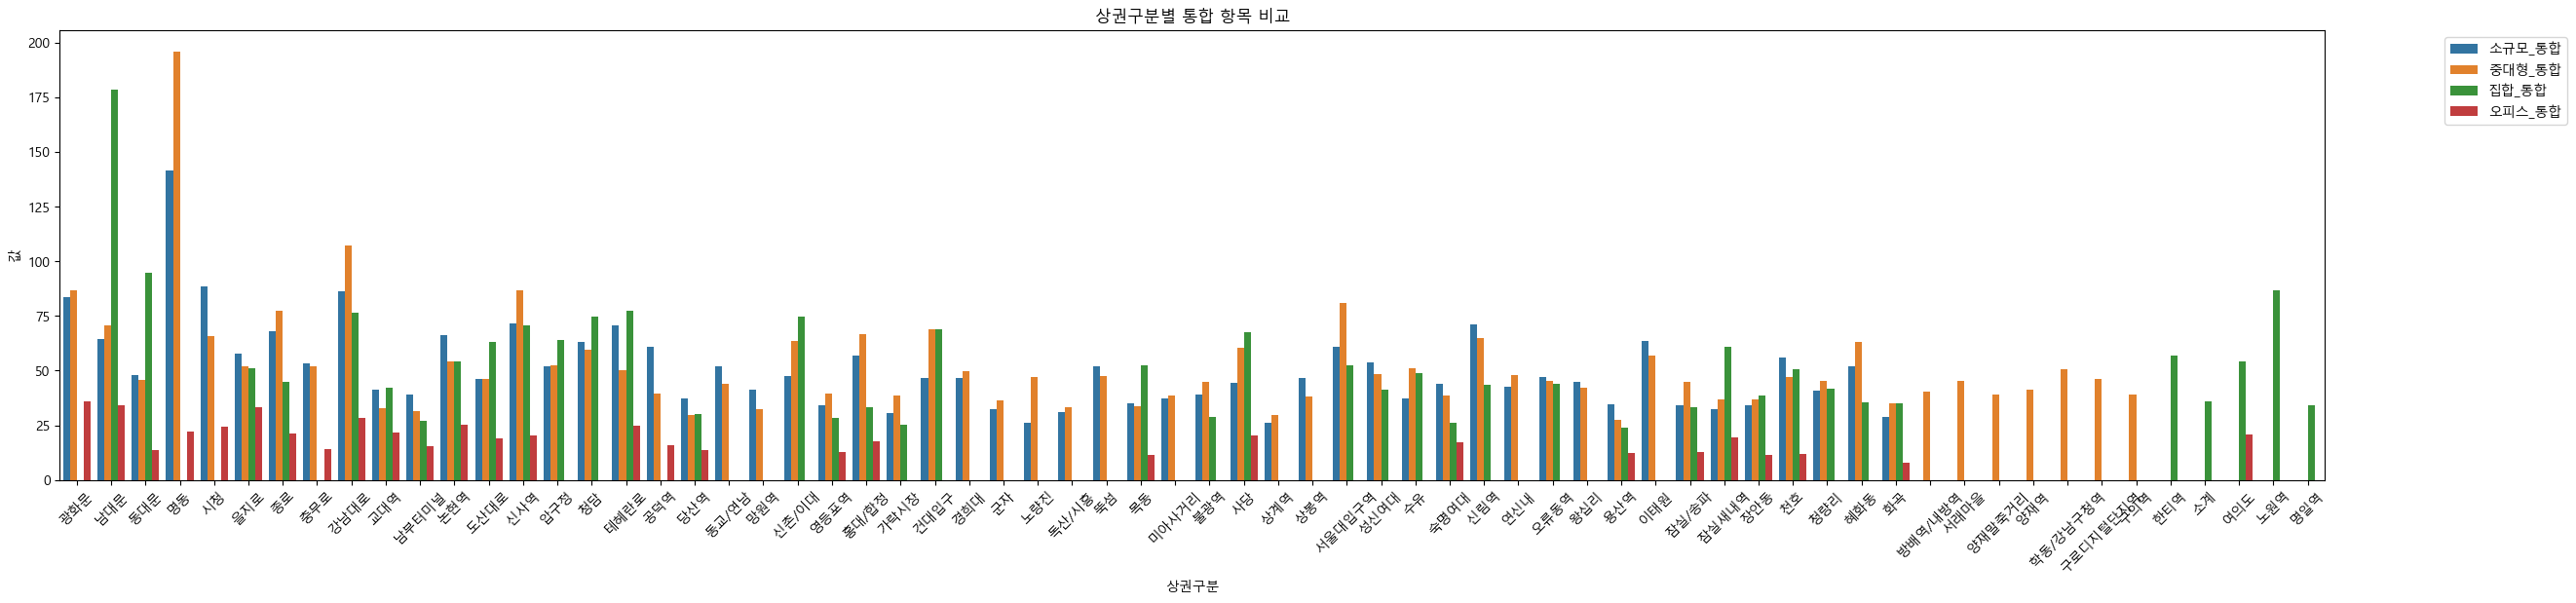

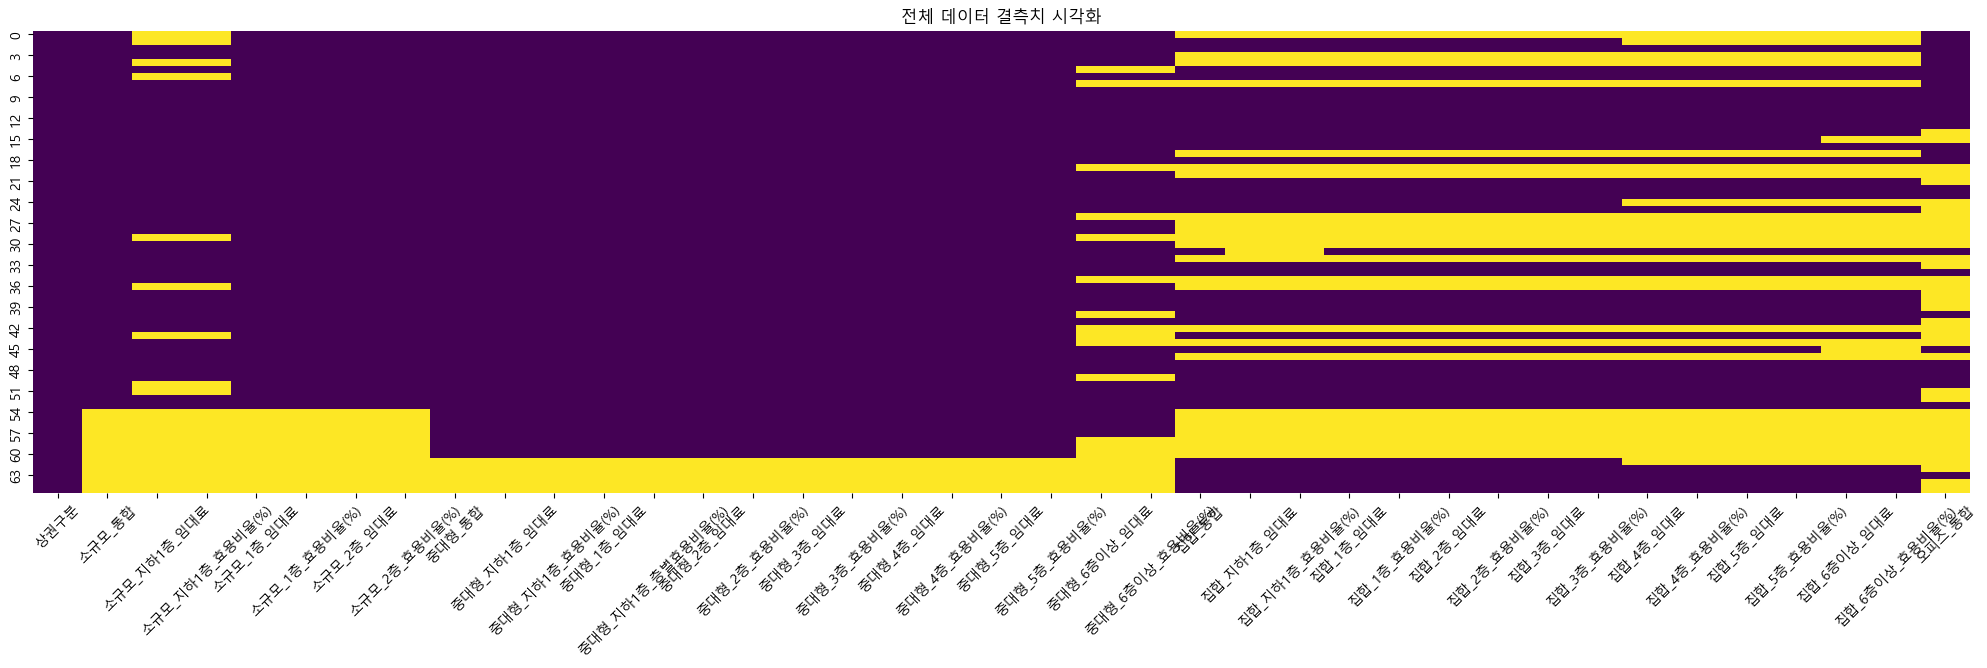

In [27]:
# 추이, 결측치 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


# 1. '통합'이 들어간 컬럼만 필터링
integrated_columns = [col for col in df_rent.columns if '통합' in col]
df_integrated = df_rent[['상권구분'] + integrated_columns]

# 상권구분별 통합 컬럼 시각화
df_melted = df_integrated.melt(id_vars='상권구분', var_name='항목', value_name='값')

plt.figure(figsize=(30, 6))
sns.barplot(data=df_melted, x='상권구분', y='값', hue='항목')
plt.title('상권구분별 통합 항목 비교')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. 전체 데이터의 결측치 시각화
plt.figure(figsize=(25, 6))
sns.heatmap(df_rent.isna(), cbar=False, cmap='viridis')
plt.xticks(rotation=45)
plt.title('전체 데이터 결측치 시각화')
plt.show()

              소규모_통합  소규모_1층_임대료    중대형_통합  중대형_1층_임대료     집합_통합  집합_1층_임대료  \
소규모_통합      1.000000    0.999159  0.880410    0.875627  0.459622   0.448624   
소규모_1층_임대료  0.999159    1.000000  0.879850    0.875107  0.463247   0.452256   
중대형_통합      0.880410    0.879850  1.000000    0.999509  0.448247   0.442227   
중대형_1층_임대료  0.875627    0.875107  0.999509    1.000000  0.444381   0.438368   
집합_통합       0.459622    0.463247  0.448247    0.444381  1.000000   0.997827   
집합_1층_임대료   0.448624    0.452256  0.442227    0.438368  0.997827   1.000000   
오피스_통합      0.570457    0.571715  0.442703    0.428662  0.609202   0.595026   

              오피스_통합  
소규모_통합      0.570457  
소규모_1층_임대료  0.571715  
중대형_통합      0.442703  
중대형_1층_임대료  0.428662  
집합_통합       0.609202  
집합_1층_임대료   0.595026  
오피스_통합      1.000000  


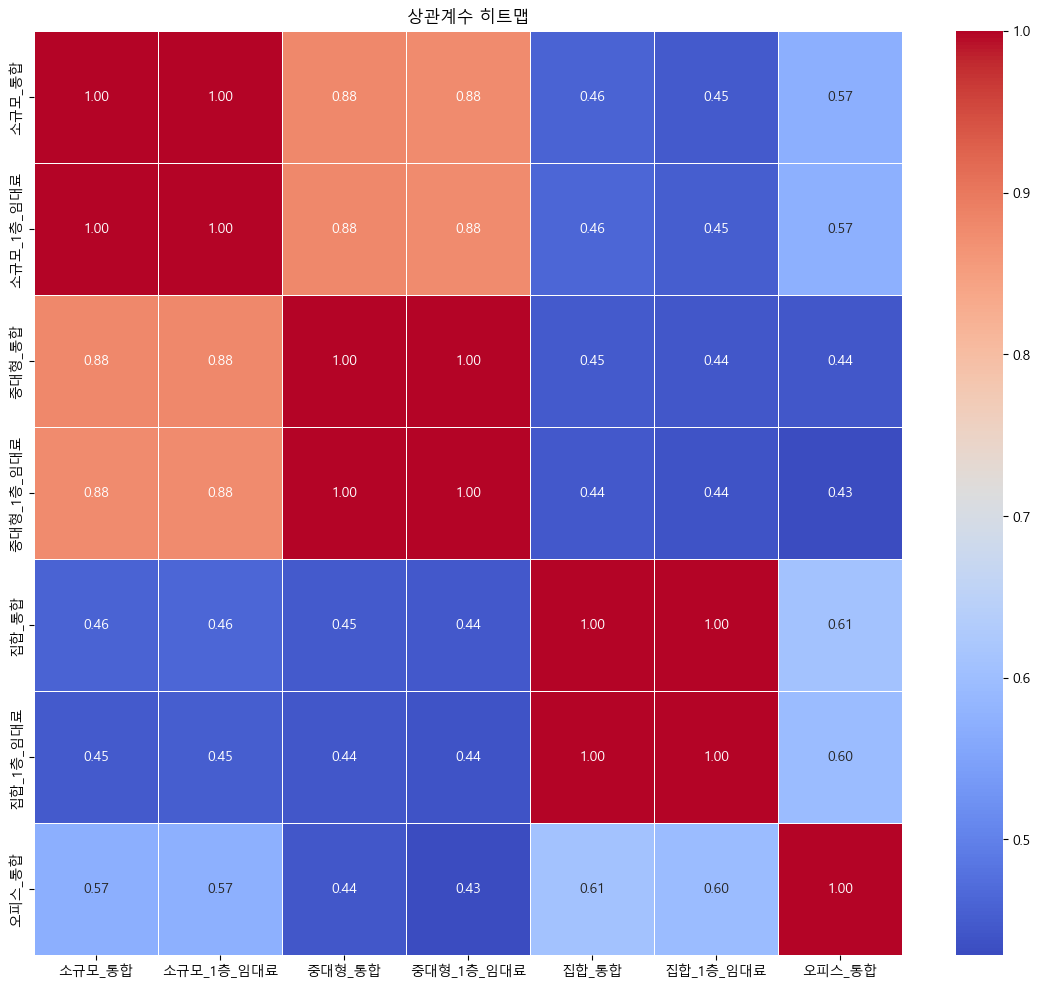

In [28]:
# 상관계수 히트맵 시각화
# 필요한 컬럼만 추출
filtered_columns = [col for col in df_rent.columns if '_1층_임대료' in col or '통합' in col  or '상권구분' in col]

df_rent_filter = df_rent[filtered_columns]

# 상관 계수 계산
correlation_matrix = df_rent_filter.iloc[:,1:].corr()

print(correlation_matrix)

# 상관계수 히트맵 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('상관계수 히트맵')
plt.show()

### 분석
- 목적: 임대료 데이터 간의 상관관계를 파악하고, 결측치가 포함된 데이터를 보간하여 보다 완전한 데이터셋을 구축
- 문제 상황:  결측치 비율이 높음
- 현황: 임대료 컬럼 간 상관관계가 있음
- 해결: 상관관계 반영하여 보간

## 3. 결측치 보간

In [32]:
from sklearn.experimental import enable_iterative_imputer  # IterativeImputer를 사용하기 위해 필요
from sklearn.impute import IterativeImputer
import numpy as np

In [34]:
# 필요한 데이터 필터링
filtered_columns = [col for col in df_rent.columns if '_임대료' in col or '통합' in col  or '상권구분' in col]
df_rent_1 = df_rent[filtered_columns]
print(df_rent_1.info())


# 결측치 비율 계산
missing_ratio = df_rent_1.isnull().mean()

# 결측치 비율에 따라 열 정렬
sorted_columns = missing_ratio.sort_values().index

# 정렬된 열 순서대로 데이터프레임 재정렬
df_sorted = df_rent_1[sorted_columns]

# IterativeImputer를 사용하여 결측치 채우기
imputer = IterativeImputer(max_iter=10, random_state=0)

df_imputed = df_sorted.copy()
df_imputed.iloc[:, 1:] = imputer.fit_transform(df_sorted.iloc[:, 1:])

# 0보다 작은 값을 NaN으로 바꾸기
df_imputed = df_imputed.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)

# 소수점 정리
df_imputed = round(df_imputed, 2)

# 원래 열 순서로 복원
df_imputed = df_imputed[df_rent_1.columns]

# 결과 확인
print(df_imputed.head())

# 결과 저장
df_imputed.to_csv('../data/임대료/임대료_결측치_채움.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   상권구분          66 non-null     object 
 1   소규모_통합        54 non-null     float64
 2   소규모_지하1층_임대료  45 non-null     float64
 3   소규모_1층_임대료    54 non-null     float64
 4   소규모_2층_임대료    54 non-null     float64
 5   중대형_통합        61 non-null     float64
 6   중대형_지하1층_임대료  61 non-null     float64
 7   중대형_1층_임대료    61 non-null     float64
 8   중대형_2층_임대료    61 non-null     float64
 9   중대형_3층_임대료    61 non-null     float64
 10  중대형_4층_임대료    61 non-null     float64
 11  중대형_5층_임대료    61 non-null     float64
 12  중대형_6층이상_임대료  47 non-null     float64
 13  집합_통합         41 non-null     float64
 14  집합_지하1층_임대료   40 non-null     float64
 15  집합_1층_임대료     41 non-null     float64
 16  집합_2층_임대료     41 non-null     float64
 17  집합_3층_임대료     41 non-null     float64
 18  집합_4층_임대료     38 non-null     fl

C:\Users\Playdata\anaconda3\envs\selenium\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Playdata\AppData\Local\Temp\ipykernel_10004\42655038.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_imputed = df_imputed.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)


# 임대료, 상권분석 데이터 병합

## 1. 상권분석 데이터 상권과 상권구획도(임대료) 상권 매칭 

In [36]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

# 상권분석의 상권 영역 데이터 읽기 
F1 = '..\data\영역\서울시 상권분석서비스(영역-상권)\서울시 상권분석서비스(영역-상권).shp'
D1 = gpd.read_file(F1, encoding='utf8')

print("상권분석(영역-상권)")
print(D1.info())

print(D1.head())


# 임대료의 상권구획도 데이터 읽기 
F3 = r'..\data\상권구획도(업로드용)\최종_상권328.shp'
D3 = gpd.read_file(F3, encoding='euc-kr')

# 서울에 해당하는 데이터만 필터링
seoul_data = D3[D3['SIDONAME'] == '서울']
print("상권구획도")
print(seoul_data.info())
print(seoul_data.head())

상권분석(영역-상권)
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TRDAR_SE_C  1650 non-null   object  
 1   TRDAR_SE_1  1650 non-null   object  
 2   TRDAR_CD    1650 non-null   object  
 3   TRDAR_CD_N  1650 non-null   object  
 4   XCNTS_VALU  1650 non-null   float64 
 5   YDNTS_VALU  1650 non-null   float64 
 6   SIGNGU_CD   1650 non-null   object  
 7   SIGNGU_CD_  1650 non-null   object  
 8   ADSTRD_CD   1650 non-null   object  
 9   ADSTRD_CD_  1650 non-null   object  
 10  RELM_AR     1650 non-null   float64 
 11  AREA        0 non-null      float64 
 12  geometry    1650 non-null   geometry
dtypes: float64(4), geometry(1), object(8)
memory usage: 167.7+ KB
None
  TRDAR_SE_C TRDAR_SE_1 TRDAR_CD         TRDAR_CD_N  XCNTS_VALU  YDNTS_VALU  \
0          A       골목상권  3110008    배화여자대학교(박노수미술관)    197093.0    453418.0   
1          U 

In [37]:
import geopandas as gpd
from shapely.geometry import Point

# 파일 경로
F3 = '../data/상권구획도(업로드용)/최종_상권328.shp'
F1 = '../data/영역/서울시 상권분석서비스(영역-상권)/서울시 상권분석서비스(영역-상권).shp'

# 상권구획도 데이터 로드
D3 = gpd.read_file(F3, encoding='euc-kr')
# 서울 데이터만 사용
D3 = D3[D3['SIDONAME'] == '서울']

# 상권분석서비스 데이터 로드
D1 = gpd.read_file(F1, encoding='utf8')

# 좌표계 변환 (GRS80_UTMK -> EPSG:5181)
D3 = D3.to_crs(epsg=5181)

# 매칭 결과를 저장할 리스트
results = []

# 상권분석서비스 영역 데이터의 각 폴리곤에 대해 상권구획도 데이터의 폴리곤과 일치 여부 확인
for idx, row in D1.iterrows():
    best_match = None
    best_overlap_area = 0
    best_distance = float('inf')
    
    # 상권분석서비스 폴리곤
    poly1 = row['geometry']
    
    for idx2, row2 in D3.iterrows():
        # 상권구획도 폴리곤
        poly2 = row2['geometry']
        
        if poly1.intersects(poly2):
            intersection = poly1.intersection(poly2)
            overlap_area = intersection.area
            if overlap_area > best_overlap_area:
                best_overlap_area = overlap_area
                best_match = row2['CNAME']
    
    # 일치하는 영역이 없는 경우 폴리곤의 중심점을 통해 가장 가까운 상권구획도 영역 찾기
    if best_match is None:
        centroid = poly1.centroid
        for idx2, row2 in D3.iterrows():
            poly2 = row2['geometry']
            distance = centroid.distance(poly2)
            if distance < best_distance:
                best_distance = distance
                best_match = row2['CNAME']
    
    # 매칭 결과 저장
    results.append({
        'TRDAR_CD': row['TRDAR_CD'],
        'TRDAR_CD_N': row['TRDAR_CD_N'],
        'CNAME': best_match,
        'Overlap_Area': best_overlap_area,
        'Distance': best_distance if best_overlap_area == 0 else 0
    })

# 매칭 결과를 GeoDataFrame으로 변환
matched_df = gpd.GeoDataFrame(results)

# 결과 출력
print(matched_df.head())

# 파일로 저장
matched_df.to_csv('../data/상권(임대료, 상권분석)_매칭_최종.csv', index = False)

  TRDAR_CD         TRDAR_CD_N CNAME   Overlap_Area    Distance
0  3110008    배화여자대학교(박노수미술관)   광화문       0.000000  699.313889
1  3001494         종로·청계 관광특구    종로  317313.444411    0.000000
2  3130021             신설종합시장   동대문    9799.528403    0.000000
3  3130002  세종마을음식문화거리(금천교시장)   광화문       0.000000  197.930218
4  3130001               통인시장   광화문       0.000000  572.633234
